# Breast Cancer Diagnosis

Firstly, we'll import the dataset:

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

/Users/rogeriobrumhermany/Projects/fiap/breast-cancer-diagnosis/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Path to dataset files: /Users/rogeriobrumhermany/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


Then some boilerplate lib importing and constant declarations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

MALIGNANT_COLOR = '#EB9486'
BENIGN_COLOR = '#6BBF59'

MALIGNANT_ID = 1
BENIGN_ID = 0

Openning dataset

In [3]:
raw_df = pd.read_csv(path + '/data.csv')
raw_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There is only one column with null values (which happens to be all of its values), `Unnamed: 32` and the is also one unneeded column, which is the `id` column.

Lets get rid of those.

Checking the diagnosis column category and its spread throught different diagnosis:

In [5]:
raw_df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Cleaning dataframe

In [6]:
df = raw_df.copy()
df.drop('Unnamed: 32', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

# Mapping diagnosis to numeric values
df['diagnosis'] = df['diagnosis'].map({'M': MALIGNANT_ID, 'B': BENIGN_ID})

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


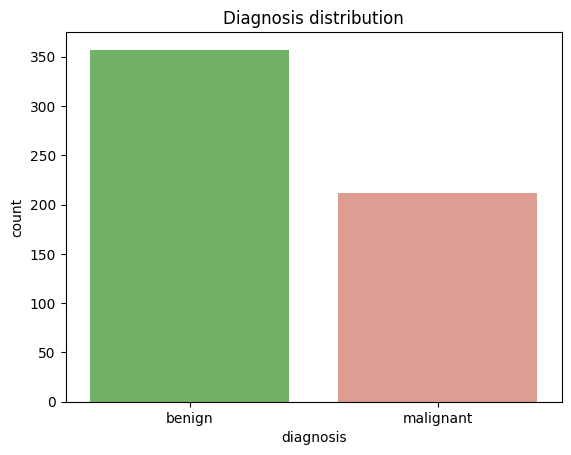

In [7]:

# dataset['diagnosis_labels'] = dataset['diagnosis'].apply(lambda x: 'malignant' if x == 'M' else 'benign')
ax = sns.countplot(df, x='diagnosis', hue='diagnosis', legend=False, palette={MALIGNANT_ID: MALIGNANT_COLOR, BENIGN_ID: BENIGN_COLOR})
ax.set_xticks([1, 0], ['malignant', 'benign'])
# ax.set_xticklabels(labels=['benign', 'malignant'])
plt.title('Diagnosis distribution')
plt.xlabel('diagnosis')
plt.show()

In [8]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


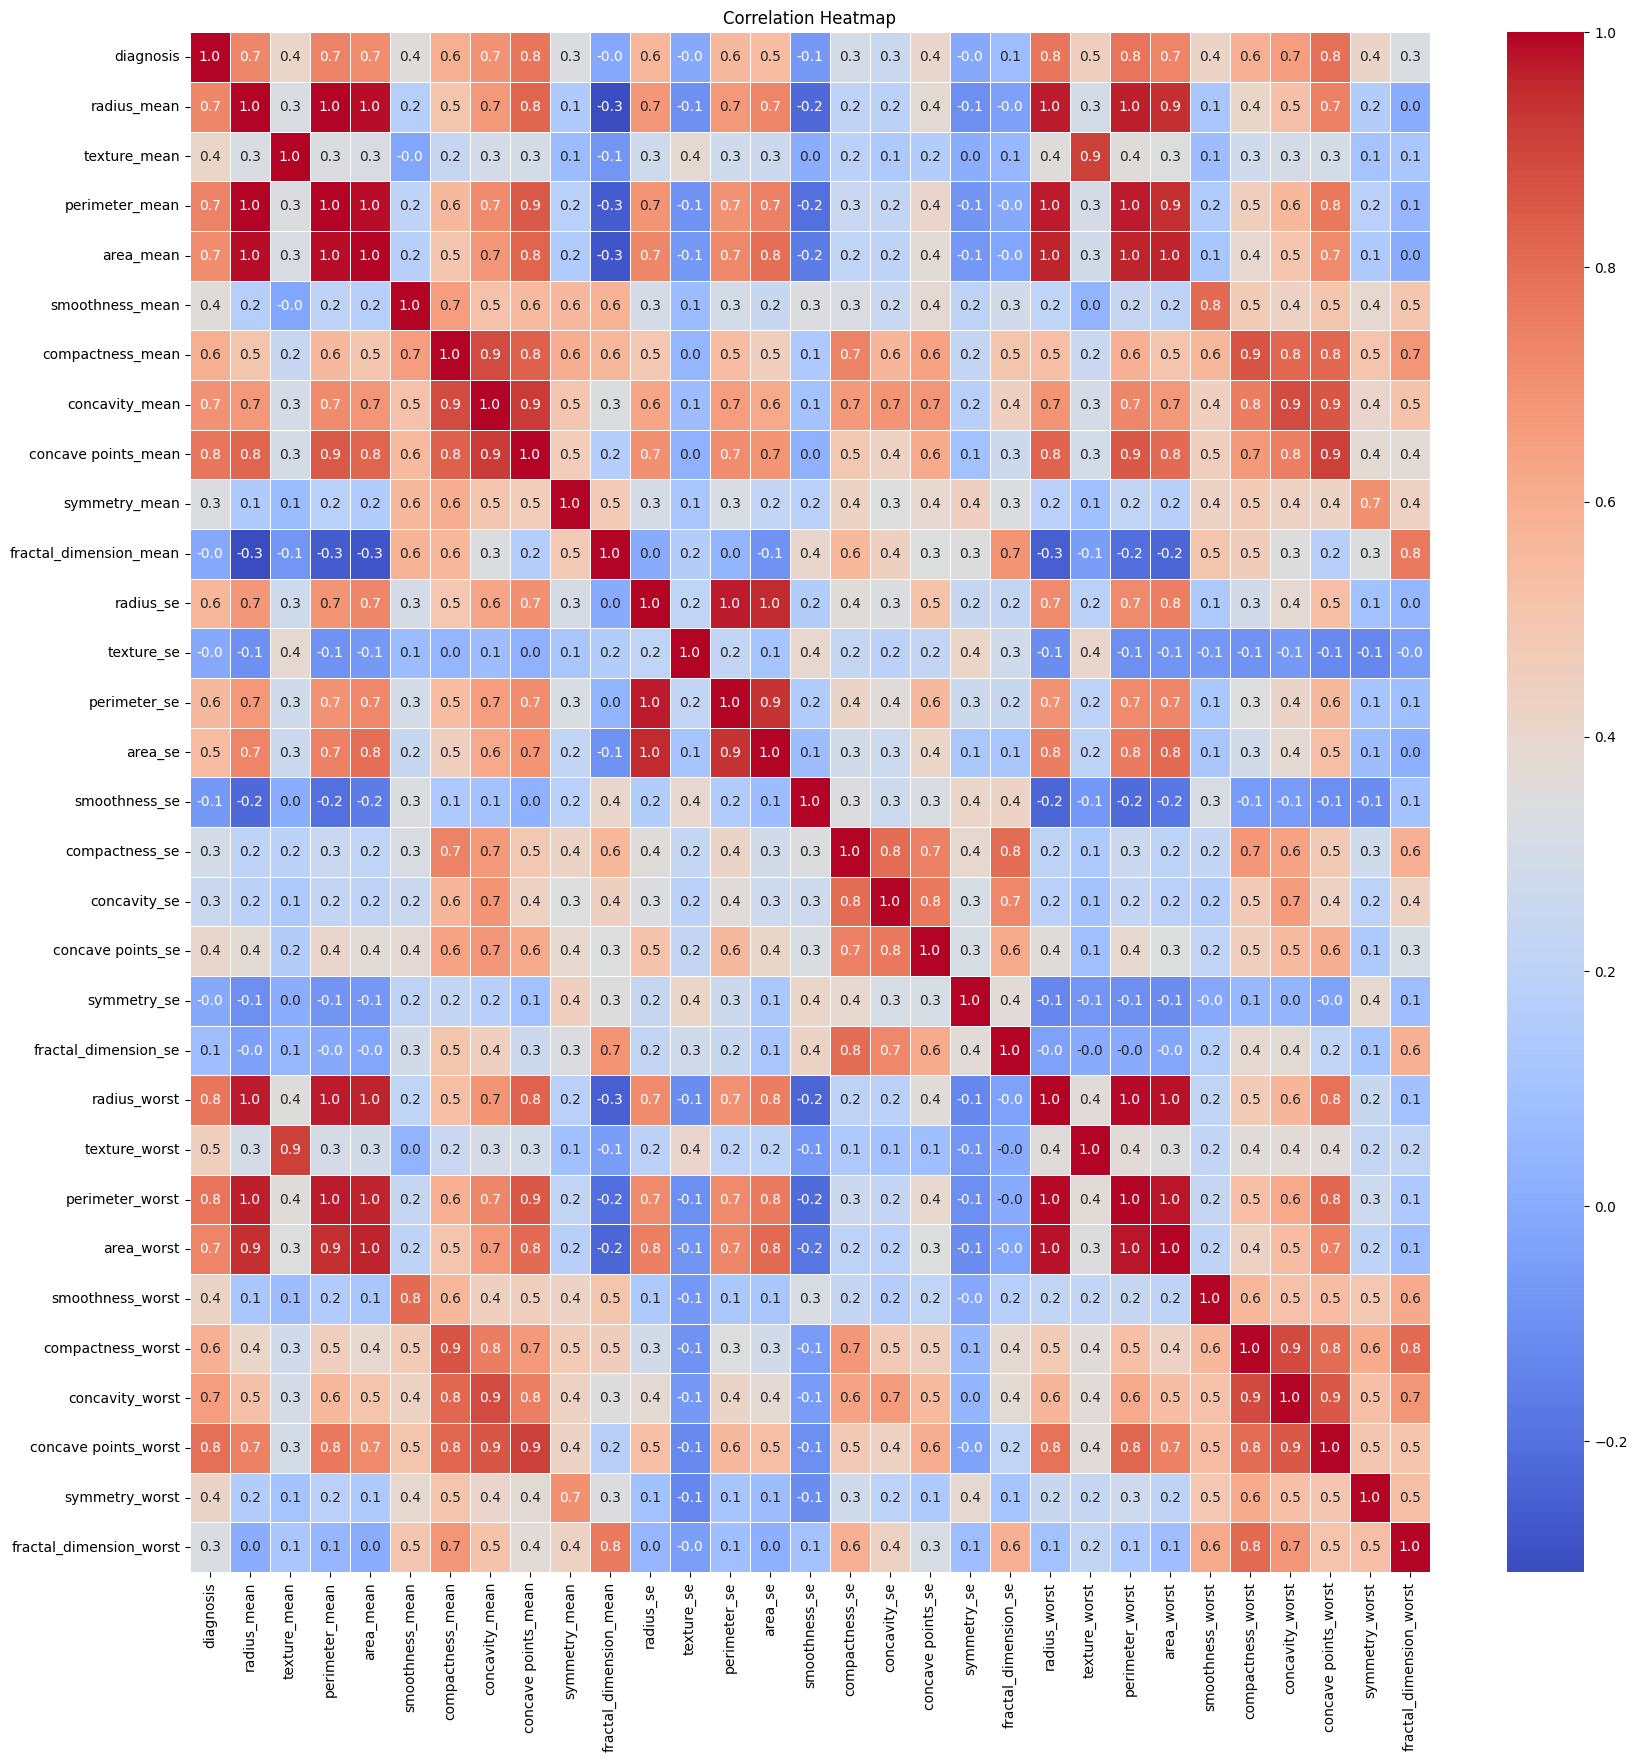

In [9]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Lets break all the columns into categories (mean, se and worst) so its easier to visualize correlations within the categories

In [10]:
mean_df = df[[col for col in df.columns if col.endswith('_mean') or col == 'diagnosis']]
se_df = df[[col for col in df.columns if col.endswith('_se') or col == 'diagnosis']]
worst_df = df[[col for col in df.columns if col.endswith('_worst') or col == 'diagnosis']]

"Mean" correlations

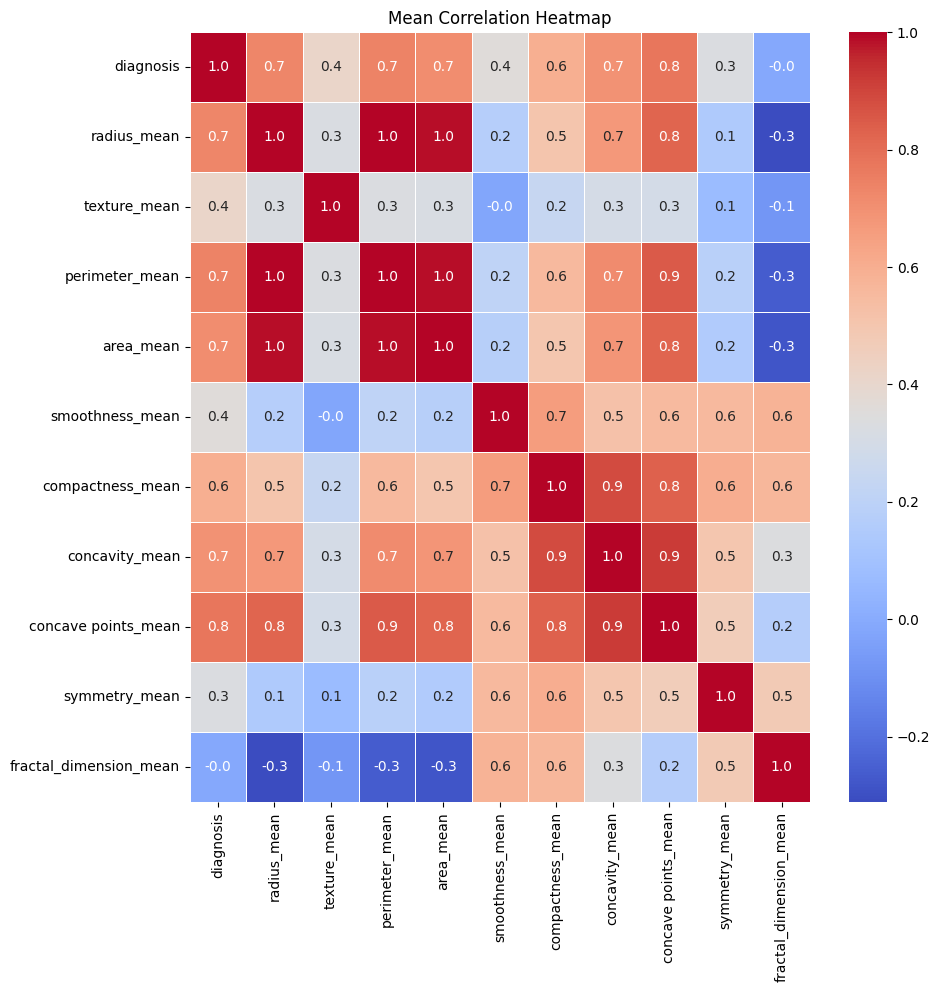

In [11]:
plt.figure(figsize=(10, 10))
sns.heatmap(mean_df.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Mean Correlation Heatmap')
plt.show()

"Se" correlations

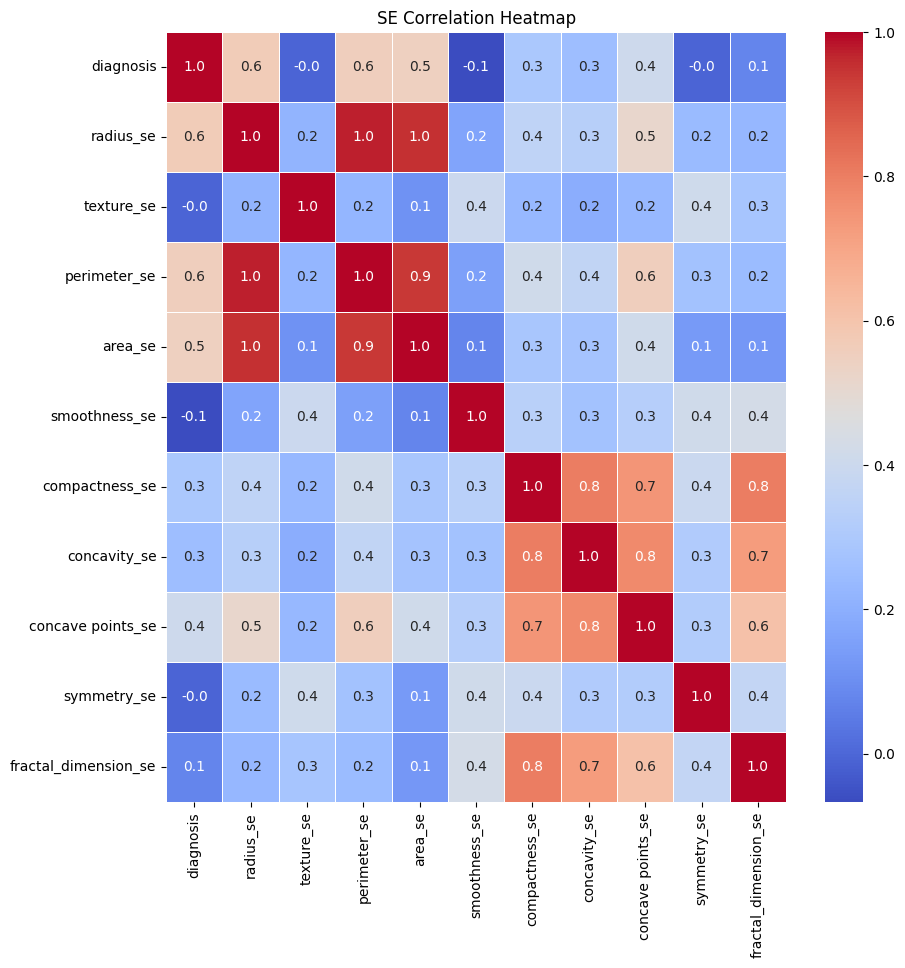

In [12]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(se_df.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('SE Correlation Heatmap')
plt.show()

"Worst" Correlations

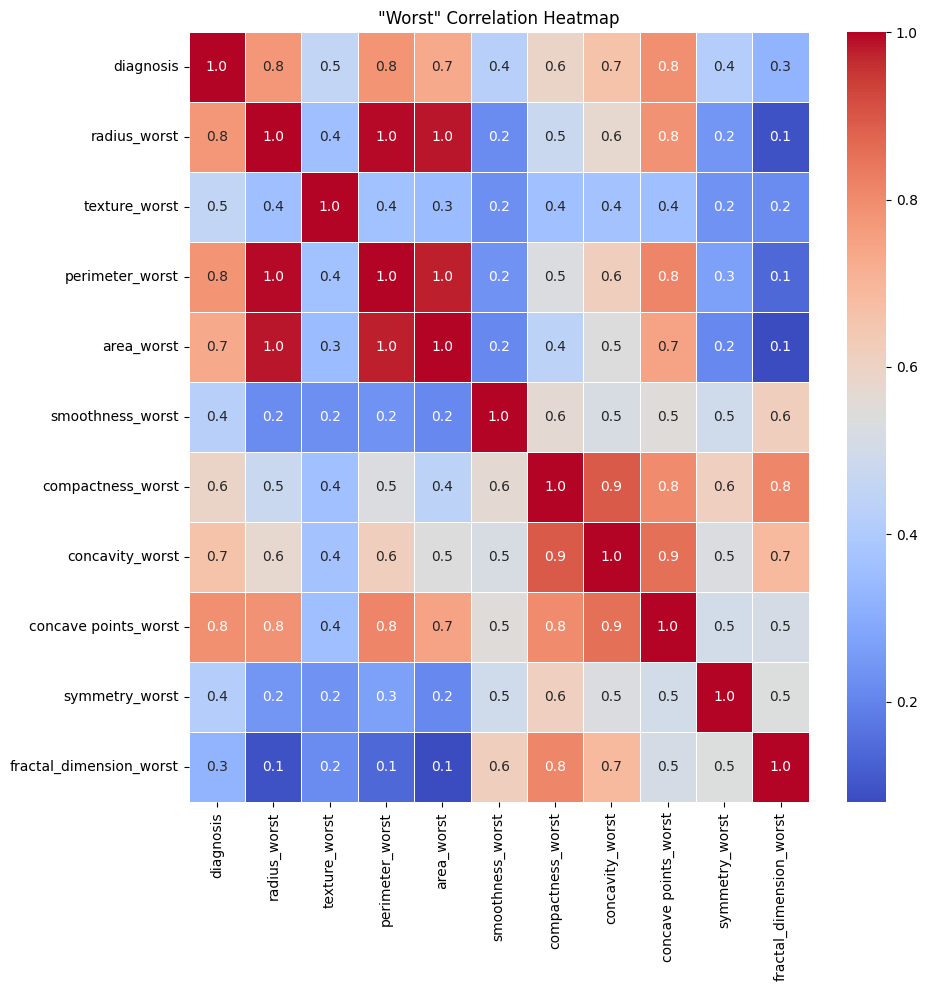

In [13]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(worst_df.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('"Worst" Correlation Heatmap')
plt.show()

Dividing groups by diagnosis

In [14]:
df_benign = df[df['diagnosis'] == BENIGN_ID]
df_malignant = df[df['diagnosis'] == MALIGNANT_ID]

Now lets compare the features within those groups

In [15]:
import math
# defining a function to help ploting the data 
def plot_hist(columns: list[str]):
    rows = math.ceil(len(columns)/3)
    fig_height = rows * 5 + 1
    print(rows)
    print(fig_height)

    fig, axes = plt.subplots(rows, 3, figsize=(20, fig_height))
    axes_flat = axes.flatten()

    for i, ax in enumerate(axes_flat):
        if i < len(columns):
            col_name = columns[i]
            min_val = min(df_benign[col_name].min(), df_malignant[col_name].min())
            max_val = max(df_benign[col_name].max(), df_malignant[col_name].max())
            
            common_bins = np.linspace(min_val, max_val, 101)
            
            df_benign[col_name].hist(bins=common_bins, density=True, ax=ax, alpha=.7, label='Benign', color='#6BBF59')
            df_malignant[col_name].hist(bins=common_bins, density=True, ax=ax, alpha=.7, label='Malignant', color='#EB9486')
            ax.set_title(col_name.replace('_', ' '))
            ax.set_ylabel('Proportion')
        else :
            ax.axis('off')

    handles, labels = axes_flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    fig.suptitle('Proportional Distribution of Features (Malignant vs. Benign)', fontsize=16)

    plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Make room for the suptitle

    plt.show()


4
21


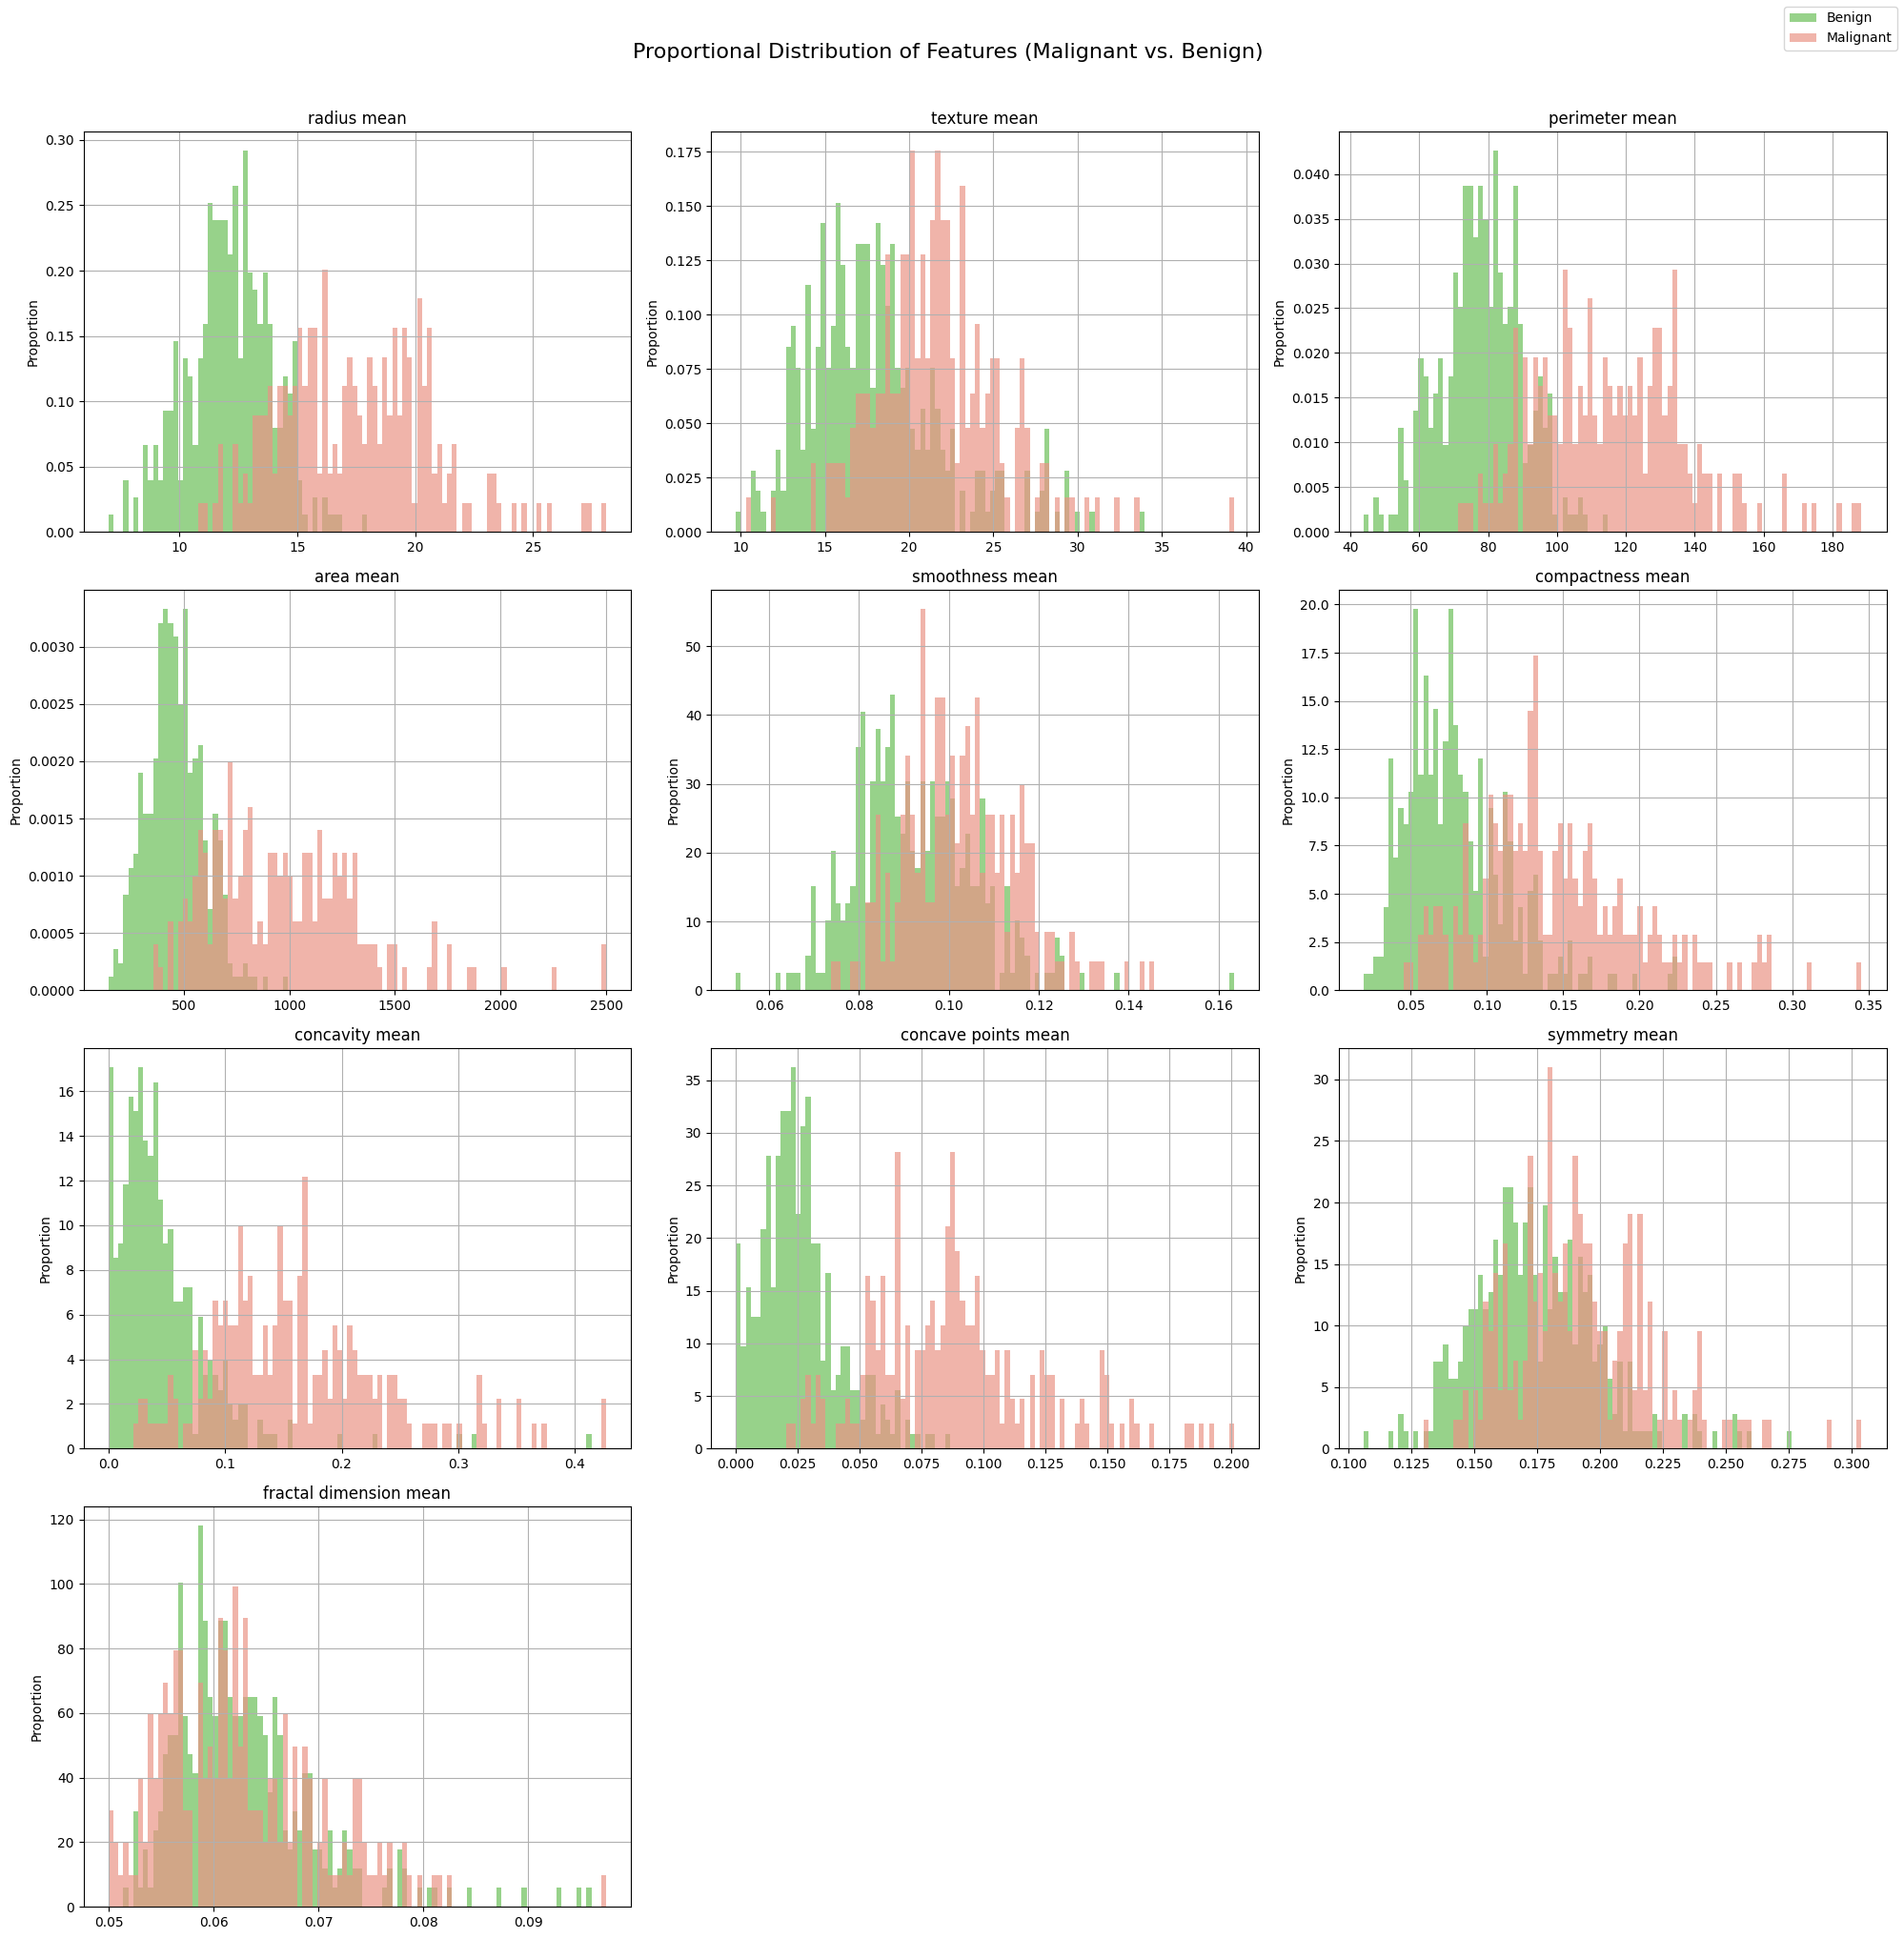

In [16]:
plot_hist([col for col in df.columns if col.endswith('mean')])

The histograms above gives us some important insights (as well as the correlation heatmap that we already saw). 

There are, at least, 3 features that will have lessweight on a prediction model, (specially because we are dealing with such a small group): `smothness_mean`, `fractal_dimension_mean`, and `symmetry_mean`

On the other hand, there are some obvious discrepancies throughout the graphics, that being the ones that store measurements (`radius_mean`, `area_mean`, and `perimeter_mean`) and the ones that store the nuclei shape irregularity (`concave points_mean`, `concavity`, and `compactness`).

4
21


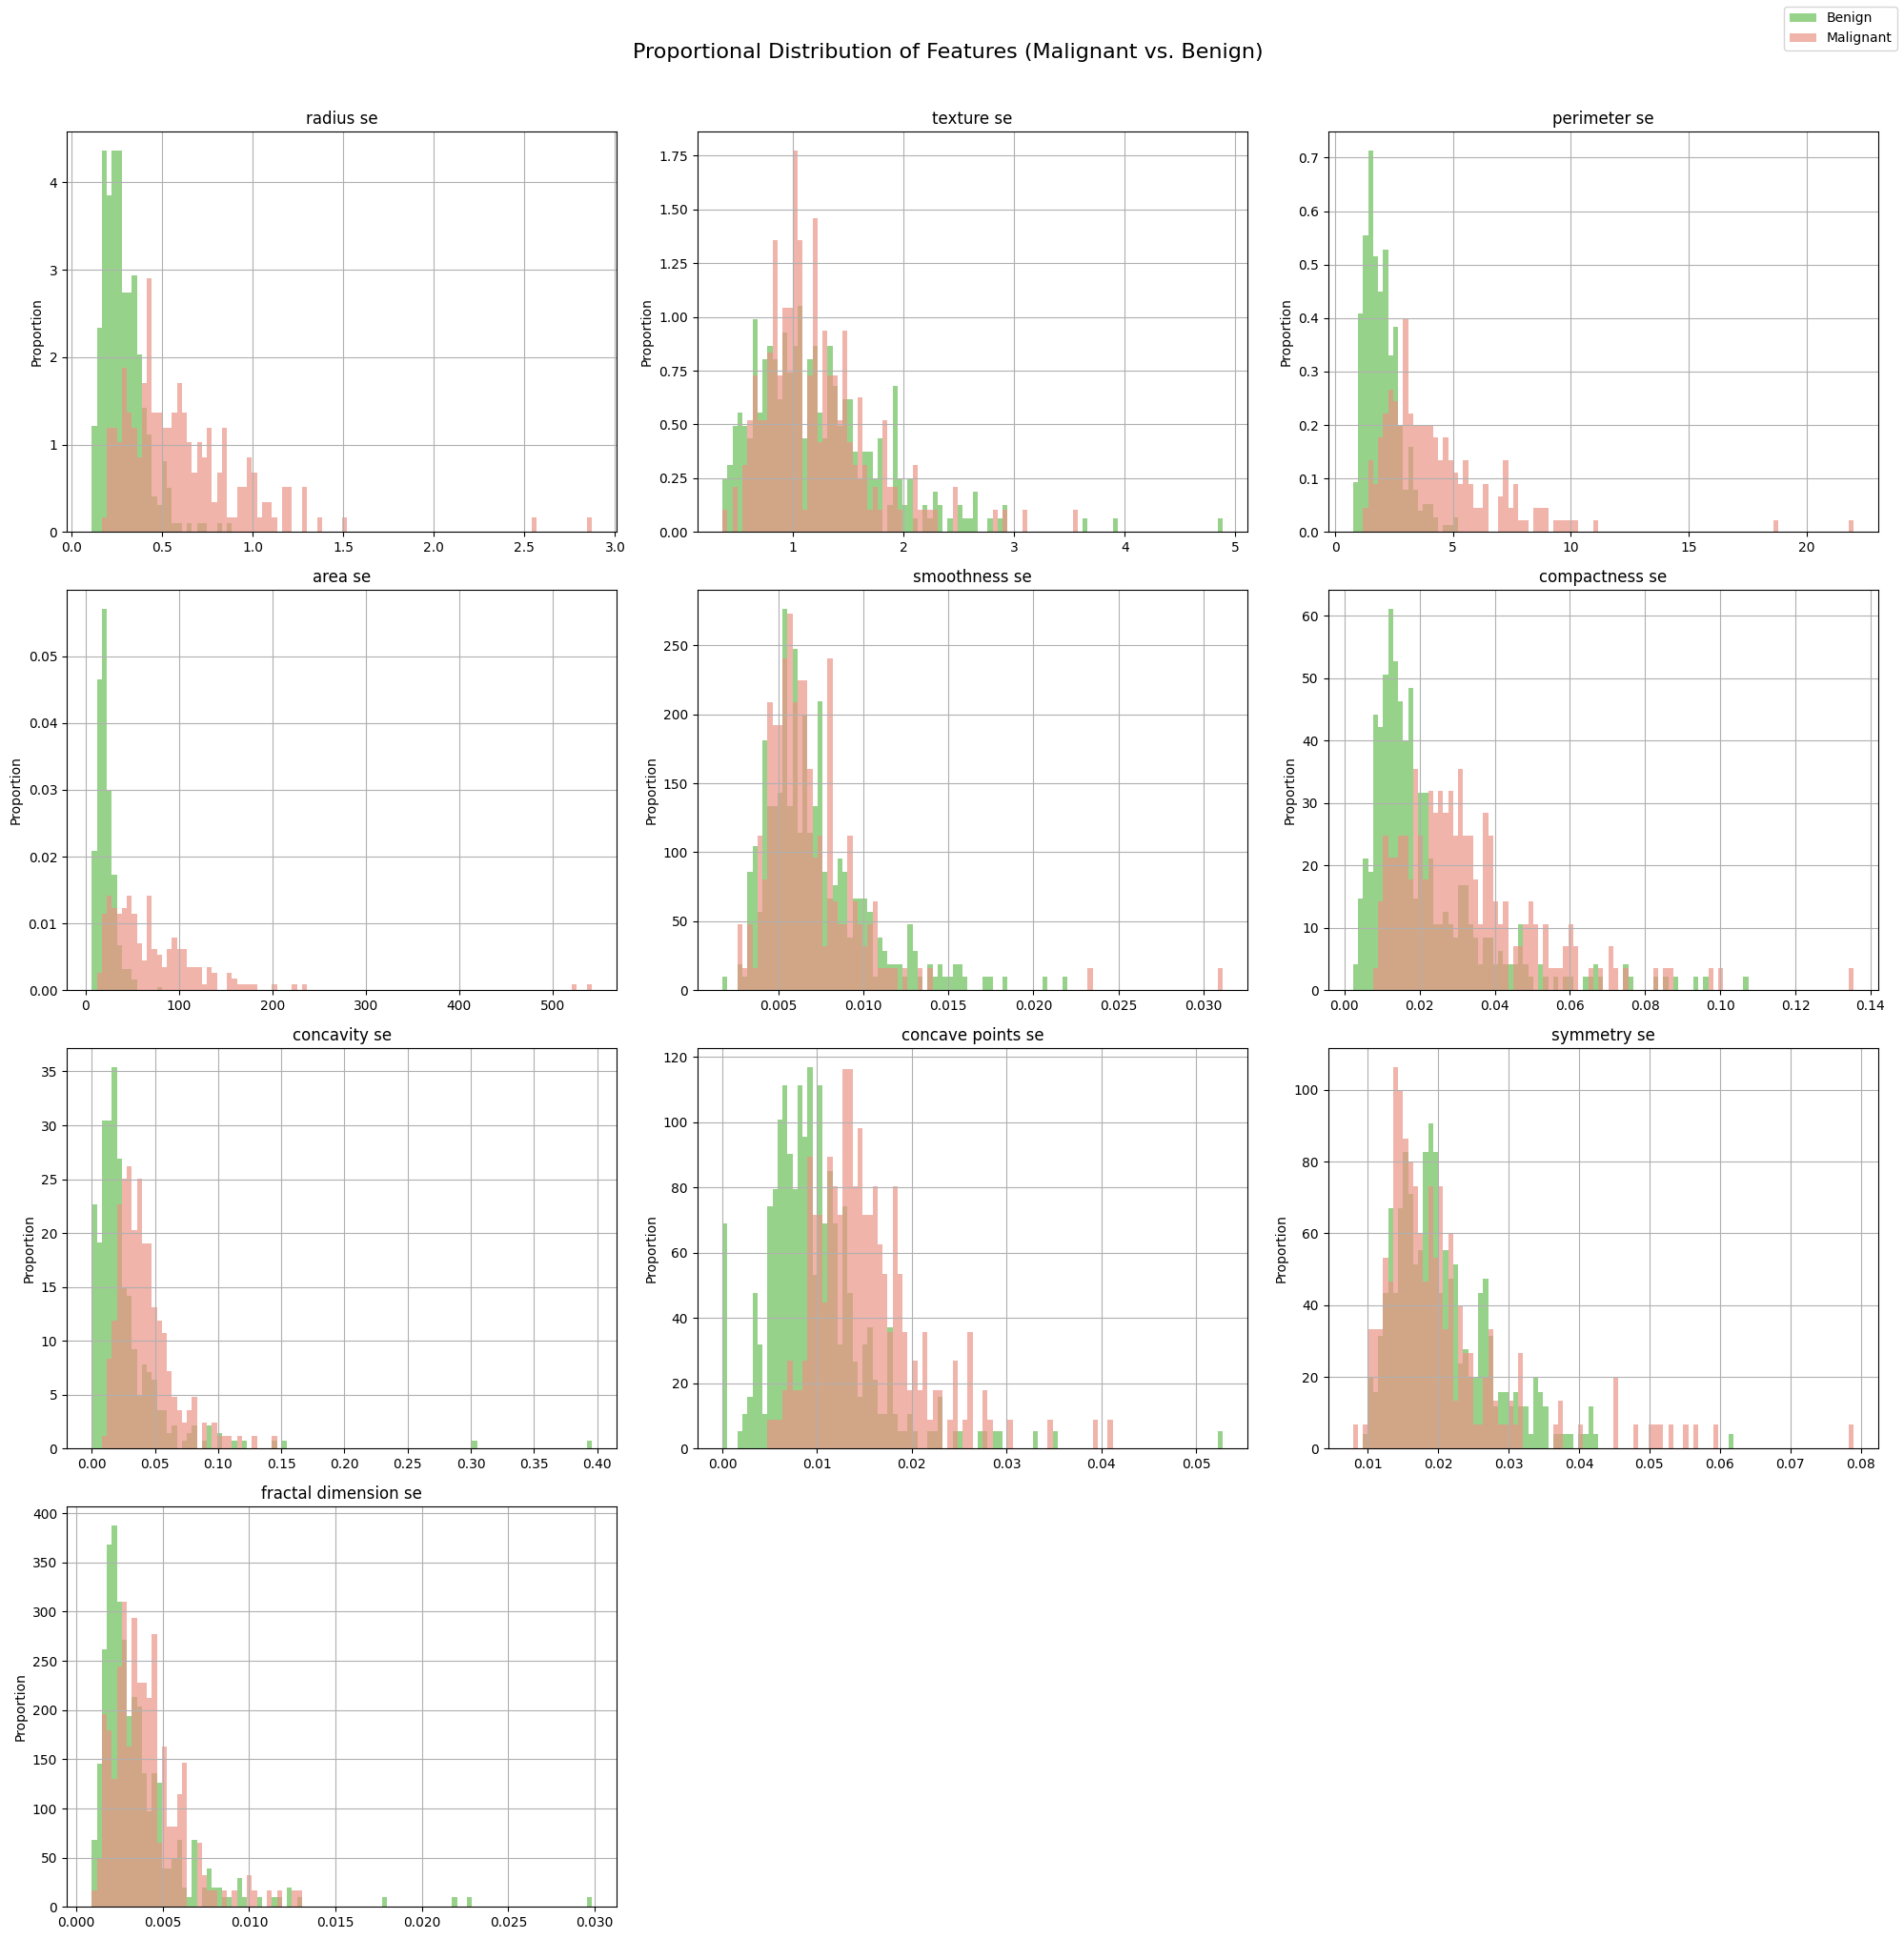

In [17]:
plot_hist([col for col in df.columns if col.endswith('_se')])

Although it is not as big of a discrepancy as seen on the mean columns, measurement and shape irregularity data also stands out here

4
21


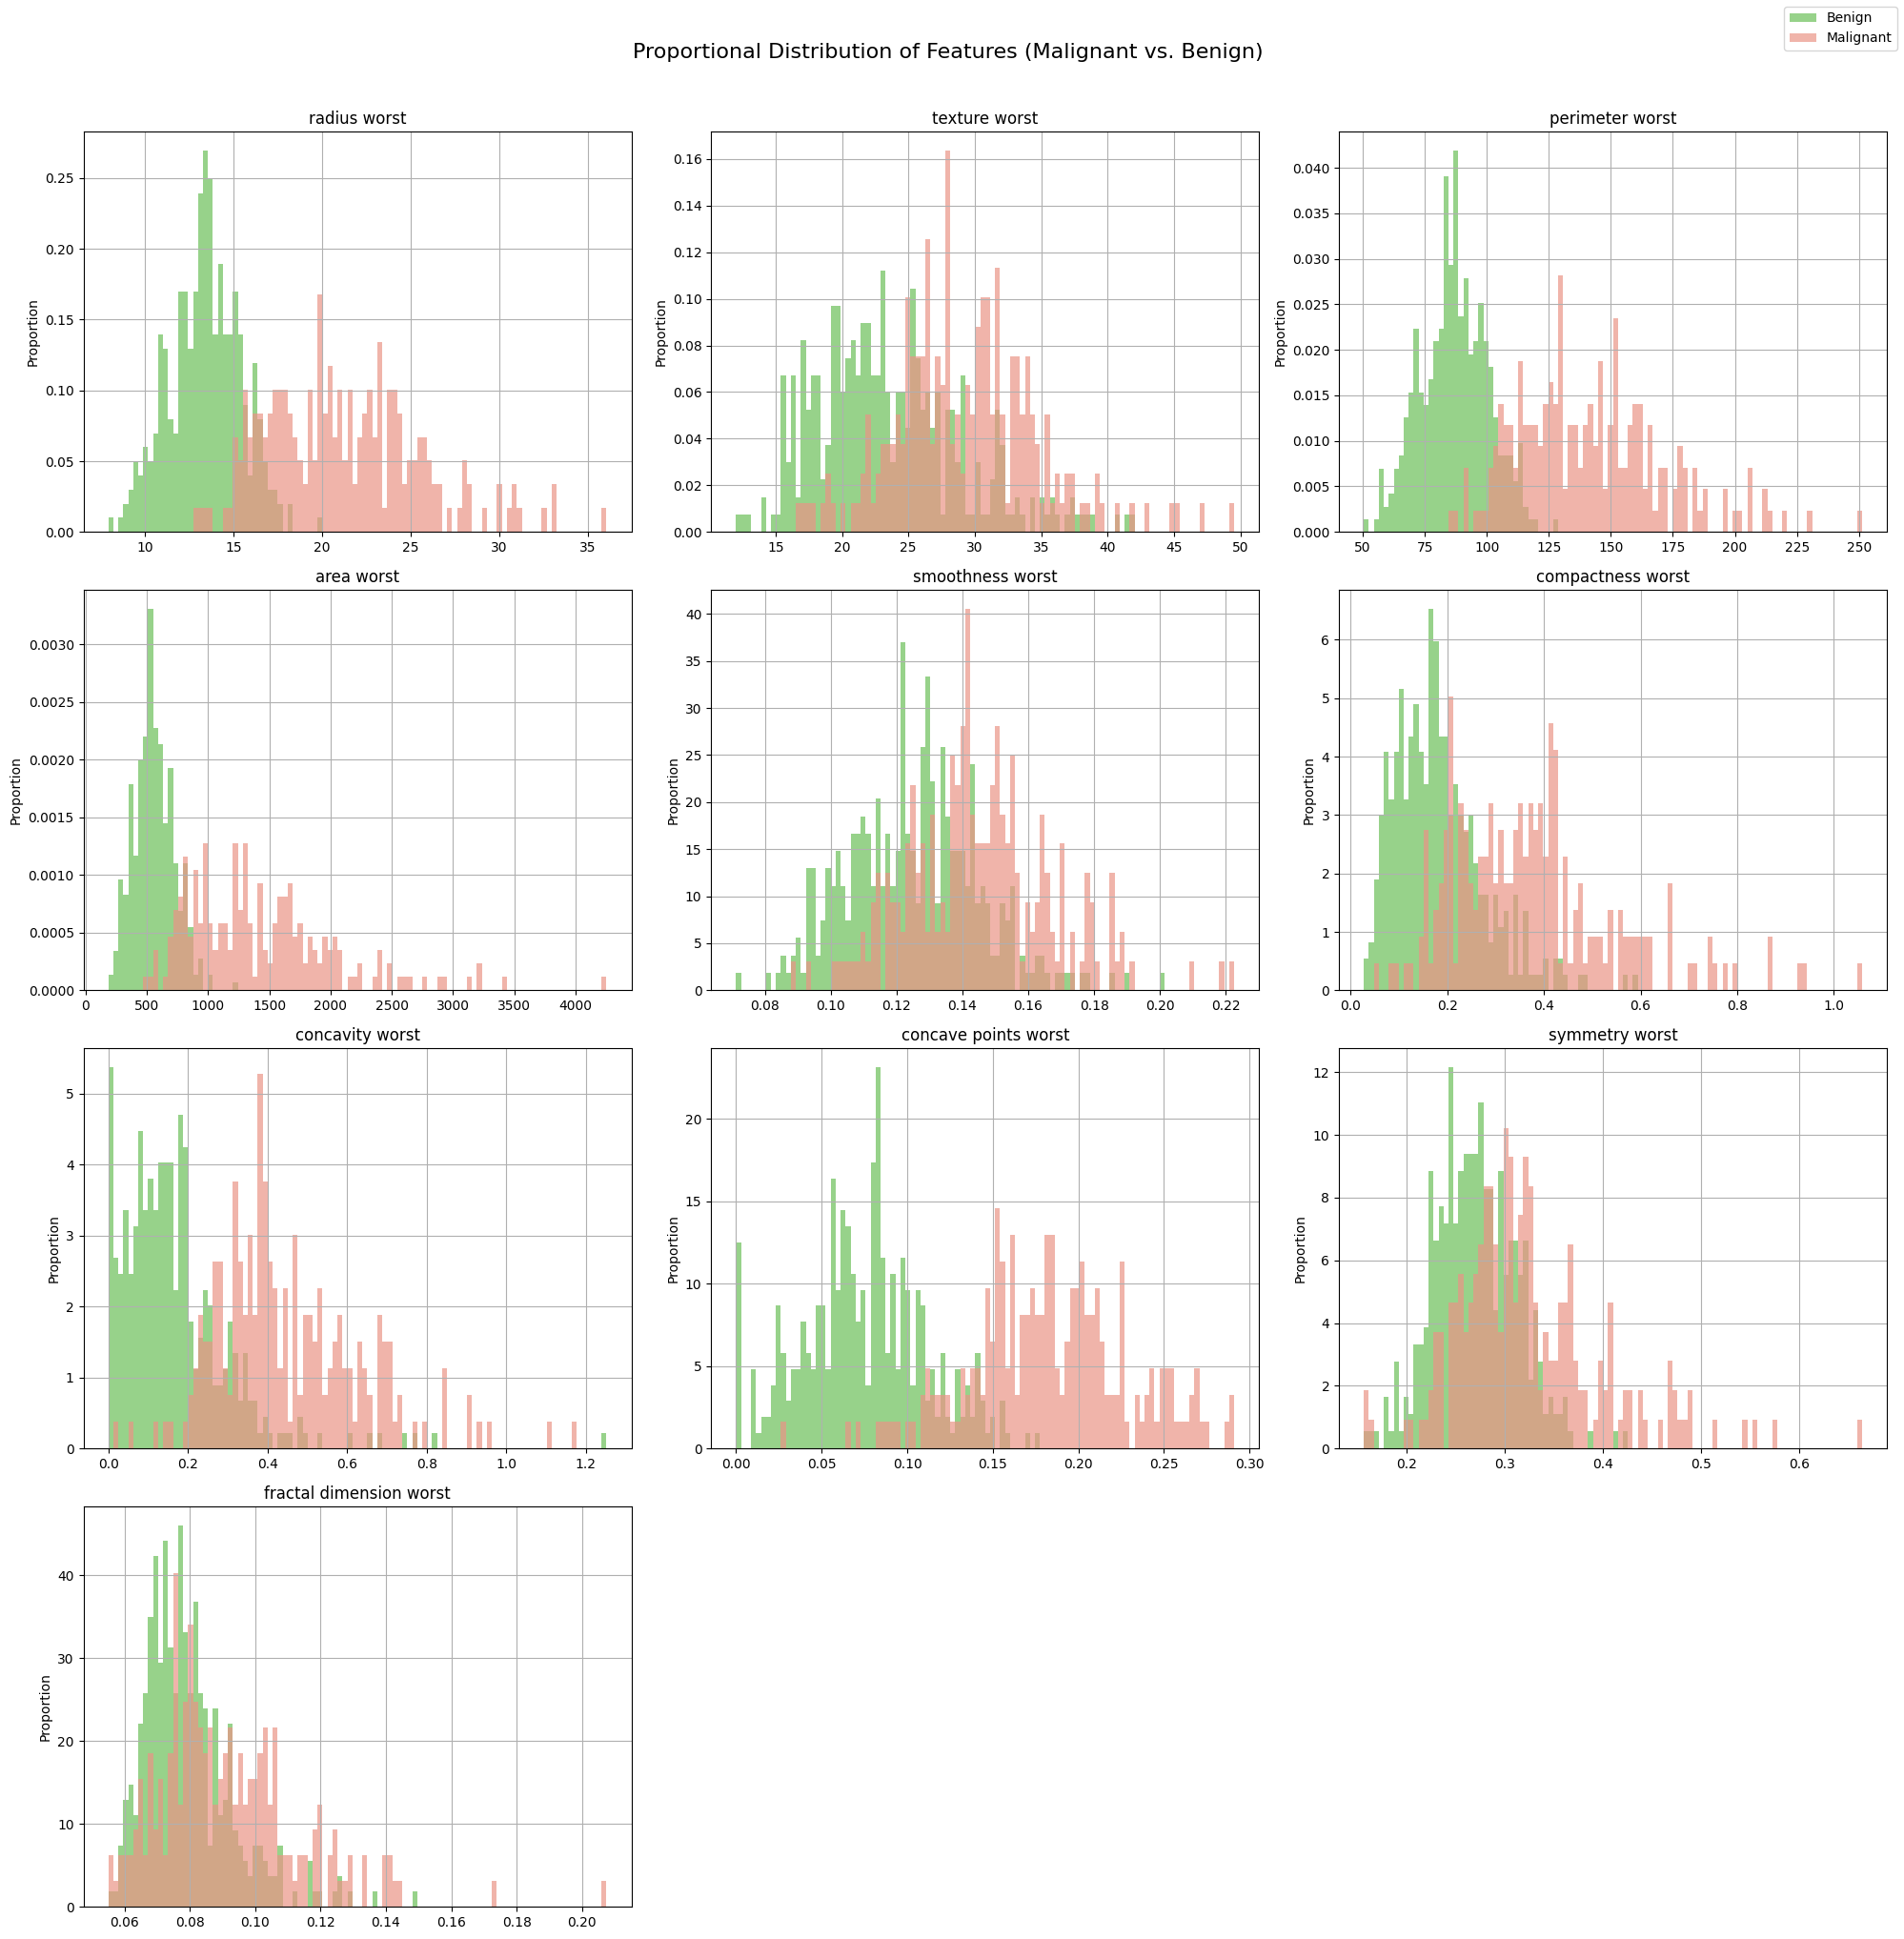

In [18]:
plot_hist([col for col in df.columns if col.endswith('_worst')])

Once again measurement and shape irregularity data stud out. "Fractal dimension" seems to have lesser impact on the final diagnosis all across the graphics as well as with the correlation heatmaps.

## Building model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

### First algorithm attempt: KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
columns_normalize_knn = [col for col in df.columns if col.endswith(('_mean', '_se', '_worst'))]
df_knn = df.copy()
df_knn[columns_normalize_knn] = (df_knn[columns_normalize_knn] - df_knn[columns_normalize_knn].min()) / (df_knn[columns_normalize_knn].max() - df_knn[columns_normalize_knn].min())
df_knn.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [22]:
X = df_knn.drop('diagnosis', axis=1)
y = df_knn['diagnosis']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Accuracy:  0.9649122807017544
Precision:  0.9534883720930233
Recall:  0.9534883720930233


Pretty impressive already.

Lets try another algorithm

### Second algorithm attempt: RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))


Accuracy:  0.9649122807017544
Precision:  0.975609756097561
Recall:  0.9302325581395349


A little better precision. A little worse recall. Which is bad for medical diagnosis.

The exact same numbers. Lets try one more time with yet another algo.

### Third algorithm attempt: XGBoost

In [29]:
from xgboost import XGBClassifier

In [35]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
bst = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, objective='binary:logistic')
bst.fit(X_train, y_train)

y_pred = bst.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Accuracy:  0.956140350877193
Precision:  0.9523809523809523
Recall:  0.9302325581395349


### Fourth algorithm attempt: MLPClassifier

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [31]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Accuracy:  0.9649122807017544
Precision:  0.9534883720930233
Recall:  0.9534883720930233


That was disapointing. MLP Classifier got the same results as KNN.


<p style="margin: 0; padding-top: 2rem">the winner is: </p>
<p style="font-size: 3em; margin-top: 0">🏆 K Nearest Neighbor 🏆</p>
